In [1]:
!git clone https://github.com/kavkt/Data-Mining-EarlyStageDiabetesPrediction.git

Cloning into 'Data-Mining-EarlyStageDiabetesPrediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


# Early Stage Diabetes Prediction


## Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Dataset

In [4]:
df = pd.read_csv('Data-Mining-EarlyStageDiabetesPrediction/dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Pre-Processing

In [5]:
# Changing Postive to 1 and Negative to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [6]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [7]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [8]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [9]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


## Correlation between features

In [10]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

## Train and Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

## Data Normalization

In [12]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [13]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
169,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0
122,0.324324,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1
278,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0.729730,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0


## Feature Selection

In [14]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size = 0.2, stratify=y, random_state = 12345)

## Data Normalization

In [16]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

## Distribution of Different Features


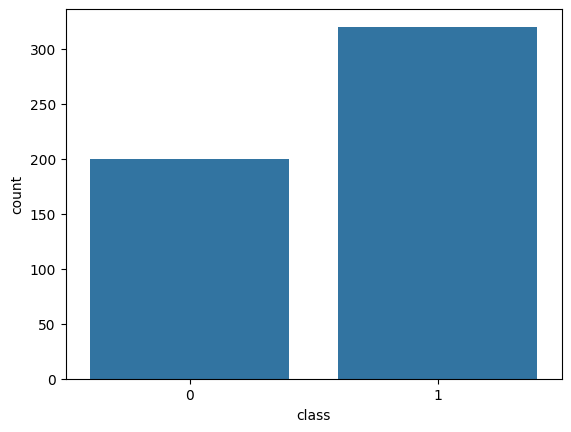

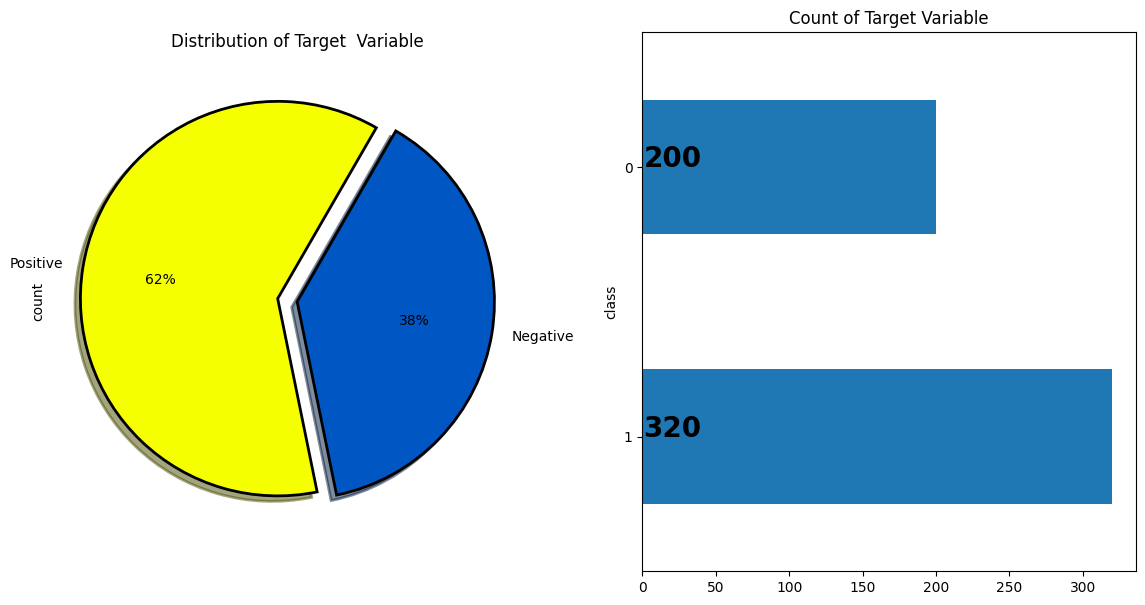

In [18]:
#Distribution of Target Variable
sns.countplot(x='class',data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

<Axes: title={'center': 'Correlation with Diabetes'}>

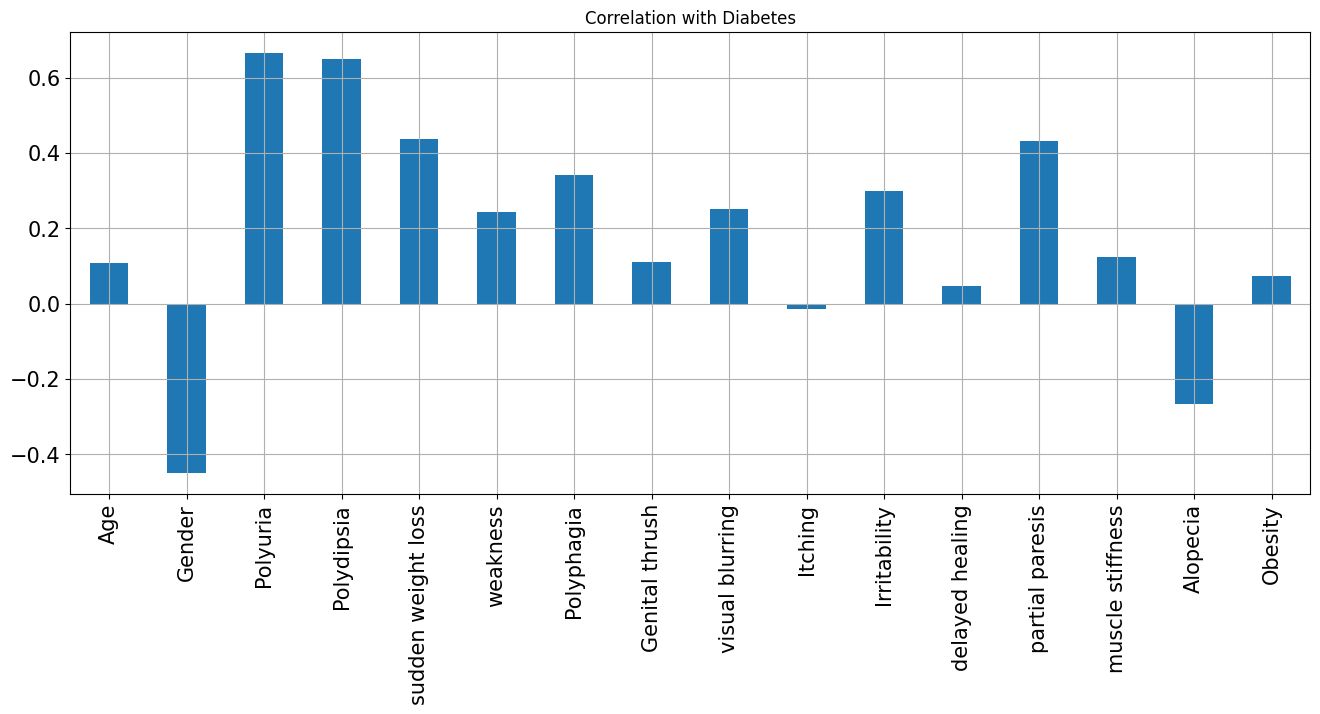

In [19]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


## Model Building

In [17]:
# Cross Validation
from sklearn import model_selection
np.random.seed(7)
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
scoring = 'accuracy'


In [31]:
# Logistic Regression
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)


acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Model Evaluation
y_pred_nb = nb.predict(X_test)
eval_nb = pd.DataFrame([['Naive Bayes', accuracy_score(y_test, y_pred_nb),
                         cross_val_score(nb, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                         precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb),
                         f1_score(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_nb)]],
                       columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_nb], ignore_index=True)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Model Evaluation
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
eval_knn = pd.DataFrame([['KNN', accuracy_score(y_test, y_pred_knn),
                          cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                          precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn),
                          f1_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_knn)]],
                        columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_knn], ignore_index=True)

In [41]:
#SVM
from sklearn.svm import SVC

# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Model Evaluation
y_pred_svm = svm.predict(X_test)
eval_svm = pd.DataFrame([['SVM', accuracy_score(y_test, y_pred_svm),
                          cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                          precision_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm),
                          f1_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_svm)]],
                        columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_svm], ignore_index=True)

In [32]:
# Random Forest
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
eval_rf = pd.DataFrame([['Random Forest', accuracy_score(y_test, y_pred_rf),
                          cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                          precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf),
                          f1_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)]],
                        columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_rf], ignore_index=True)

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

# Initialize the KFold parameters
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metrics for each fold
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
roc_scores = []

for train_index, test_index in kf.split(X):
    # Splitting data into training and testing sets for the current fold
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Normalizing Age feature
    X_train_kf[['Age']] = minmax.fit_transform(X_train_kf[['Age']])
    X_test_kf[['Age']] = minmax.transform(X_test_kf[['Age']])

    # Define the model (same as before)
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_kf.shape[1],)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_kf, y_train_kf, epochs=50, batch_size=10, verbose=0)  # Set verbose to 0 to hide the training log

    # Predictions
    y_pred_kf = model.predict(X_test_kf)
    y_pred_kf = (y_pred_kf > 0.5).astype(int).reshape(X_test_kf.shape[0])

    # Calculating metrics
    acc_scores.append(accuracy_score(y_test_kf, y_pred_kf))
    prec_scores.append(precision_score(y_test_kf, y_pred_kf))
    rec_scores.append(recall_score(y_test_kf, y_pred_kf))
    f1_scores.append(f1_score(y_test_kf, y_pred_kf))
    roc_scores.append(roc_auc_score(y_test_kf, y_pred_kf))

# Displaying the average scores across all folds
print(f'Cross-Validation Accuracy: {np.mean(acc_scores):.4f}')
print(f'Cross-Validation Precision: {np.mean(prec_scores):.4f}')
print(f'Cross-Validation Recall: {np.mean(rec_scores):.4f}')
print(f'Cross-Validation F1 Score: {np.mean(f1_scores):.4f}')
print(f'Cross-Validation ROC AUC Score: {np.mean(roc_scores):.4f}')
eval_nn = pd.DataFrame([['Neural Network ', np.mean(acc_scores),
                          np.mean(acc_scores),
                          np.mean(prec_scores),np.mean(rec_scores),
                          np.mean(f1_scores), np.mean(roc_scores)]],
                        columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_nn], ignore_index=True)

4/4 [==============================] - 0s 3ms/step
Cross-Validation Accuracy: 0.9596
Cross-Validation Precision: 0.9720
Cross-Validation Recall: 0.9620
Cross-Validation F1 Score: 0.9665
Cross-Validation ROC AUC Score: 0.9587


In [48]:
# Results till Check Point-2
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.942308,0.894251,0.926471,0.984375,0.954545,0.929688
1,Random Forest,0.990385,0.966144,0.984615,1.000000,0.992248,0.987500
2,Naive Bayes,0.894231,0.899071,0.873239,0.968750,0.918519,0.871875
3,KNN,0.951923,0.896574,1.000000,0.921875,0.959350,0.960938
4,SVM,0.942308,0.889315,0.939394,0.968750,0.953846,0.934375
5,Neural Network,0.959615,0.959615,0.971992,0.962031,0.966507,0.958667


In [49]:
from lightgbm import LGBMClassifier

# LightGBM Model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# Model Evaluation
y_pred_lgbm = lgbm.predict(X_test)
eval_lgbm = pd.DataFrame([['LightGBM', accuracy_score(y_test, y_pred_lgbm),
                           cross_val_score(lgbm, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                           precision_score(y_test, y_pred_lgbm), recall_score(y_test, y_pred_lgbm),
                           f1_score(y_test, y_pred_lgbm), roc_auc_score(y_test, y_pred_lgbm)]],
                         columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results=pd.concat([results, eval_lgbm], ignore_index=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 256, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615385 -> initscore=0.470004
[LightGBM] [Info] Start training from score 0.470004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [51]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.3 MB/s eta 0:00:00


In [52]:
from catboost import CatBoostClassifier

# CatBoost Model
catboost = CatBoostClassifier(verbose=0)  # `verbose=0` turns off the training messages
catboost.fit(X_train, y_train)

# Model Evaluation
y_pred_catboost = catboost.predict(X_test)
eval_catboost = pd.DataFrame([['CatBoost', accuracy_score(y_test, y_pred_catboost),
                               cross_val_score(catboost, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                               precision_score(y_test, y_pred_catboost), recall_score(y_test, y_pred_catboost),
                               f1_score(y_test, y_pred_catboost), roc_auc_score(y_test, y_pred_catboost)]],
                             columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

results=pd.concat([results, eval_catboost], ignore_index=True)


In [53]:
from xgboost import XGBClassifier

# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Model Evaluation
y_pred_xgb = xgb.predict(X_test)
eval_xgb = pd.DataFrame([['XGBoost', accuracy_score(y_test, y_pred_xgb),
                          cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='accuracy').mean(),
                          precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb),
                          f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)]],
                        columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

results=pd.concat([results, eval_xgb], ignore_index=True)

In [54]:
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.942308,0.894251,0.926471,0.984375,0.954545,0.929688
1,Random Forest,0.990385,0.966144,0.984615,1.000000,0.992248,0.987500
2,Naive Bayes,0.894231,0.899071,0.873239,0.968750,0.918519,0.871875
3,KNN,0.951923,0.896574,1.000000,0.921875,0.959350,0.960938
4,SVM,0.942308,0.889315,0.939394,0.968750,0.953846,0.934375
5,Neural Network,0.959615,0.959615,0.971992,0.962031,0.966507,0.958667
6,LightGBM,0.990385,0.953949,0.984615,1.000000,0.992248,0.987500
7,CatBoost,0.990385,0.970964,0.984615,1.000000,0.992248,0.987500
8,XGBoost,0.990385,0.970964,0.984615,1.000000,0.992248,0.987500


## Plotting ROC

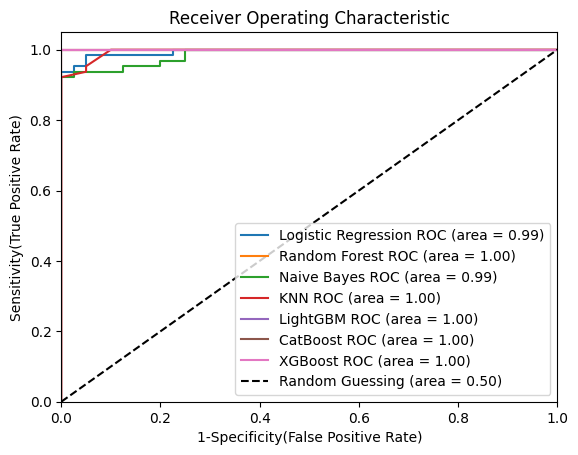

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prepare figure
plt.figure()

# Models list
models = [
    {
        'label': 'Logistic Regression',
        'model': logi,  # Assuming `svm` is your trained SVM model
    },
    {
        'label': 'Random Forest',
        'model': rf,  # Assuming `rf` is your trained Random Forest model
    },
     {
        'label': 'Naive Bayes',
        'model': nb,  # Assuming `svm` is your trained SVM model
    },
    {
        'label': 'KNN',
        'model': knn,  # Assuming `rf` is your trained Random Forest model
    },
    {
        'label': 'LightGBM',
        'model': lgbm,  # Assuming `rf` is your trained Random Forest model
    },
     {
        'label': 'CatBoost',
        'model': catboost,  # Assuming `svm` is your trained SVM model
    },
    {
        'label': 'XGBoost',
        'model': xgb,  # Assuming `rf` is your trained Random Forest model
    }
]

# Plot ROC curve for each model
for m in models:
    # Generate the prediction probabilities
    probas_ = m['model'].predict_proba(X_test)

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))

# Plot Base Line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
